In [1]:
#===============================
# Importing python libraries 
#===============================

import pandas as pd
from pandas.io.json import json_normalize
import requests, matplotlib as plt,re
import numpy as np
from PIL import Image
import json, tweepy
import os, time,datetime
from bs4 import BeautifulSoup
from IPython.display import clear_output   
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_colwidth', -1)

# Gathering

In [2]:
#==============================
# Define constant variables
#==============================
consumer_key = '4evCzuEVtZ4GQy7hs042GBILV'
consumer_secret = 'bQDNR0jevqh1z30udll4F78mpMMNlxFGHtvr4NIYJbie2HAOKd'
access_token = '14645040-eOUaxzox4rrP8KlI4iiRaGQVZT9JCjmxtwp41vucf'
access_secret = 'NSN4YdaNX2DQfayt1pnzeNVAnTvaCL67XZOjUgdHW7zID'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

pd.options.display.max_columns=500
pd.options.display.max_colwidth=-1

url_image_prediction='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_prediction=url_image_prediction.split('/')[-1]
tweet_json='tweet_json.txt'
 
%matplotlib inline

In [3]:
#====================================
# Download image prediction tsv file
#====================================
r=requests.get(url_image_prediction)
with open(image_prediction,'wb') as file:
    file.write(r.content)

In [4]:
df_twitter_archive_enhanced=pd.read_csv('twitter-archive-enhanced.csv')
df_image_predication=pd.read_csv(image_prediction,sep='\t')

In [5]:
df_twitter_archive_enhanced[df_twitter_archive_enhanced['tweet_id']==684222868335505415]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121,110,None,None,None,None,None


In [6]:
#==========================================================
# Download tweets based on tweet id and read to tweets list
# the entire downloading process takes over 3 hrs
# due to 15 mins interval 
#==========================================================

lst_tweets=[]
lst_query_errs=[]
lst_retweet_favorite_count=[]
if os.path.exists(tweet_json):
    os.remove(tweet_json)

#reset_time=api.rate_limit_status('statuses')['resources']['statuses']['/statuses/show/:id']['reset']   

#======================================
# Slice ids into a list consisting of
# multiple sublists that each contains 
# max 100 ids
#======================================
 
size=100

lst_ids=[df_twitter_archive_enhanced.tweet_id.tolist()[i:i+size] 
         for i  in range(0, len(df_twitter_archive_enhanced.tweet_id.tolist()), size)]

#====================================
# Query tweets by ids and append 
# info into corresponding lists
#====================================
count=0
for i in lst_ids:
    
    try:
        statuses=api.statuses_lookup(i) 
        
        for t in statuses:
            lst_tweets.append(t._json) 
            #lst_retweet_favorite_count.append([t.id,t.favorite_count,t.retweet_count])
        #-------------------------------------
        # Compare ids returned with ones sent 
        # to find ones with error and append to 
        # query_errs list
        # ------------------------------------
        temp_list=list(set(i)-set(statuses.ids()))
        
        
        if not temp_list is None:
            for x in temp_list:
                lst_query_errs.append(x)
        
        #----------------------------------
        # Track index of current id group
        # and print out info 
        #-----------------------------------
        count+=1
        
        # Print ids and current time
        print ("id group index: "+str(count)+' Current time: '+time.ctime())

  
    except Exception as e:
        print ('Query on tweet_id '+str(count) +' has error: '+str(e))
        query_errs.append(str(i)+' '+str(e))
        
print ('Downloading has finished...')



id group index: 1 Current time: Sun Mar 18 16:51:20 2018
id group index: 2 Current time: Sun Mar 18 16:51:21 2018
id group index: 3 Current time: Sun Mar 18 16:51:22 2018
id group index: 4 Current time: Sun Mar 18 16:51:23 2018
id group index: 5 Current time: Sun Mar 18 16:51:24 2018
id group index: 6 Current time: Sun Mar 18 16:51:24 2018
id group index: 7 Current time: Sun Mar 18 16:51:25 2018
id group index: 8 Current time: Sun Mar 18 16:51:26 2018
id group index: 9 Current time: Sun Mar 18 16:51:26 2018
id group index: 10 Current time: Sun Mar 18 16:51:27 2018
id group index: 11 Current time: Sun Mar 18 16:51:28 2018
id group index: 12 Current time: Sun Mar 18 16:51:29 2018
id group index: 13 Current time: Sun Mar 18 16:51:29 2018
id group index: 14 Current time: Sun Mar 18 16:51:30 2018
id group index: 15 Current time: Sun Mar 18 16:51:30 2018
id group index: 16 Current time: Sun Mar 18 16:51:31 2018
id group index: 17 Current time: Sun Mar 18 16:51:32 2018
id group index: 18 Curr

In [6]:
#-----------------------------------
# displaying ids that failed query
#-----------------------------------
lst_query_errs

[888202515573088257,
 873697596434513921,
 861769973181624320,
 869988702071779329,
 866816280283807744,
 842892208864923648,
 827228250799742977,
 802247111496568832,
 775096608509886464]

In [7]:
len(lst_query_errs)

9

In [8]:
#--------------------------
# Write to tweet_json file
#--------------------------
with open (tweet_json,'a',encoding='utf-8') as file: 
    for t in lst_tweets:
        file.write(str(t)+'\n')  

# Assessing

In [9]:
#-----------------------------
# Read tweet_json into pandas
#-----------------------------
df_tweets=pd.io.json.json_normalize(lst_tweets)

In [10]:
#------------------------------------
# Extracting tweet_id favorite_count
# and retweet_count
#------------------------------------
df_retweet_favorite_count=pd.DataFrame(df_tweets[['id','favorite_count','retweet_count']])
df_retweet_favorite_count.rename(columns={'id':'tweet_id'},inplace=True)

In [11]:
df_retweet_favorite_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 3 columns):
tweet_id          2347 non-null int64
favorite_count    2347 non-null int64
retweet_count     2347 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


In [12]:
#--------------------------
# duplicate dataframes 
#--------------------------
df_tweets_copy=df_tweets.copy()
df_twitter_archive_enhanced_copy=df_twitter_archive_enhanced.copy()
df_image_predication_copy=df_image_predication.copy()
df_retweet_favorite_count_copy=df_retweet_favorite_count.copy()

In [13]:
df_twitter_archive_enhanced_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
df_twitter_archive_enhanced_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [15]:
df_image_predication_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_image_predication_copy.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1159,733828123016450049,https://pbs.twimg.com/media/Ci8UxxcW0AYgHDh.jpg,2,beagle,0.472324,True,Walker_hound,0.121779,True,Saint_Bernard,0.114640,True
1911,853639147608842240,https://pbs.twimg.com/media/C9i8RhhXoAAdkMT.jpg,1,German_shepherd,0.509879,True,malinois,0.237311,True,kelpie,0.046916,True
842,695051054296211456,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,1,Boston_bull,0.761454,True,pug,0.075395,True,Chihuahua,0.041598,True
1650,809220051211603969,https://pbs.twimg.com/media/CzrtWDbWEAAmIhy.jpg,1,Pomeranian,0.819511,True,Samoyed,0.141241,True,Pembroke,0.013455,True


In [17]:
df_tweets_copy.sample(1)

,contributors,coordinates,created_at,entities.hashtags,entities.media,entities.symbols,entities.urls,entities.user_mentions,extended_entities.media,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,place.bounding_box.coordinates,place.bounding_box.type,place.contained_within,place.country,place.country_code,place.full_name,place.id,place.name,place.place_type,place.url,possibly_sensitive,quoted_status.contributors,quoted_status.coordinates,quoted_status.created_at,quoted_status.entities.hashtags,quoted_status.entities.media,quoted_status.entities.symbols,quoted_status.entities.urls,quoted_status.entities.user_mentions,quoted_status.extended_entities.media,quoted_status.favorite_count,quoted_status.favorited,quoted_status.geo,quoted_status.id,quoted_status.id_str,quoted_status.in_reply_to_screen_name,quoted_status.in_reply_to_status_id,quoted_status.in_reply_to_status_id_str,quoted_status.in_reply_to_user_id,quoted_status.in_reply_to_user_id_str,quoted_status.is_quote_status,quoted_status.lang,quoted_status.place,quoted_status.place.bounding_box.coordinates,quoted_status.place.bounding_box.type,quoted_status.place.contained_within,quoted_status.place.country,quoted_status.place.country_code,quoted_status.place.full_name,quoted_status.place.id,quoted_status.place.name,quoted_status.place.place_type,quoted_status.place.url,quoted_status.possibly_sensitive,quoted_status.retweet_count,quoted_status.retweeted,quoted_status.source,quoted_status.text,quoted_status.truncated,quoted_status.user.contributors_enabled,quoted_status.user.created_at,quoted_status.user.default_profile,quoted_status.user.default_profile_image,quoted_status.user.description,quoted_status.user.entities.description.urls,quoted_status.user.entities.url.urls,quoted_status.user.favourites_count,quoted_status.user.follow_request_sent,quoted_status.user.followers_count,quoted_status.user.following,quoted_status.user.friends_count,quoted_status.user.geo_enabled,quoted_status.user.has_extended_profile,quoted_status.user.id,quoted_status.user.id_str,quoted_status.user.is_translation_enabled,quoted_status.user.is_translator,quoted_status.user.lang,quoted_status.user.listed_count,quoted_status.user.location,quoted_status.user.name,quoted_status.user.notifications,quoted_status.user.profile_background_color,quoted_status.user.profile_background_image_url,quoted_status.user.profile_background_image_url_https,quoted_status.user.profile_background_tile,quoted_status.user.profile_banner_url,quoted_status.user.profile_image_url,quoted_status.user.profile_image_url_https,quoted_status.user.profile_link_color,quoted_status.user.profile_sidebar_border_color,quoted_status.user.profile_sidebar_fill_color,quoted_status.user.profile_text_color,quoted_status.user.profile_use_background_image,quoted_status.user.protected,quoted_status.user.screen_name,quoted_status.user.statuses_count,quoted_status.user.time_zone,quoted_status.user.translator_type,quoted_status.user.url,quoted_status.user.utc_offset,quoted_status.user.verified,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status.contributors,retweeted_status.coordinates,retweeted_status.created_at,retweeted_status.entities.hashtags,retweeted_status.entities.media,retweeted_status.entities.symbols,retweeted_status.entities.urls,retweeted_status.entities.user_mentions,retweeted_status.extended_entities.media,retweeted_status.favorite_count,retweeted_status.favorited,retweeted_status.geo,retweeted_status.id,retweeted_status.id_str,retweeted_status.in_reply_to_screen_name,retweeted_status.in_reply_to_status_id,retweeted_status.in_reply_to_status_id_str,retweeted_status.in_reply_to_user_id,retweeted_status.in_reply_to_user_id_str,retweeted_status.is_quote_status,retweeted_status.lang,retweeted_status.place,retweeted_status.place.bounding_box.coordinates,retweeted_status.place.bounding_bo

In [18]:
df_retweet_favorite_count_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 3 columns):
tweet_id          2347 non-null int64
favorite_count    2347 non-null int64
retweet_count     2347 non-null int64
dtypes: int64(3)
memory usage: 55.1 KB


In [19]:
df_retweet_favorite_count_copy.head(4)

,tweet_id,favorite_count,retweet_count
0,876484053909872640,18947,2467
1,886366144734445568,21309,3249
2,877611172832227328,0,82
3,888078434458587136,21957,3584


In [20]:
#--------------------------------------------------
# join three tables through tweet_id
#--------------------------------------------------
df_twitter_archive_master=df_twitter_archive_enhanced_copy.merge(df_image_predication_copy,on='tweet_id')
df_twitter_archive_master=df_twitter_archive_master.merge(df_retweet_favorite_count_copy,on='tweet_id')

In [21]:
df_twitter_archive_master.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1905,668975677807423489,NaN,NaN,2015-11-24 02:13:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jeremy. He hasn't grown into his skin yet. Ears hit the floor. Probably trips on them sometimes. 11/10 https://t.co/LqAMlFVBoY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668975677807423489/photo/1,11,10,Jeremy,None,None,None,None,https://pbs.twimg.com/media/CUit1O1WoAEBHjj.jpg,1,basset,0.605437,True,Welsh_springer_spaniel,0.184783,True,Saint_Bernard,0.116299,True,1372,626
1275,690932576555528194,NaN,NaN,2016-01-23 16:22:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Buddy. He's testing out the water. Such caution. Much reserve. 12/10 https://t.co/FQZGSQIQLS,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690932576555528194/photo/1,12,10,Buddy,None,None,None,None,https://pbs.twimg.com/media/CZavgf4WkAARpFM.jpg,1,snorkel,0.526536,False,muzzle,0.048089,False,scuba_diver,0.034226,False,3560,1130
1792,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764863651840/photo/1,420,10,None,None,None,None,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,25738,9423


In [22]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2070 entries, 0 to 2069
Data columns (total 30 columns):
tweet_id                      2070 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2070 non-null object
source                        2070 non-null object
text                          2070 non-null object
retweeted_status_id           76 non-null float64
retweeted_status_user_id      76 non-null float64
retweeted_status_timestamp    76 non-null object
expanded_urls                 2070 non-null object
rating_numerator              2070 non-null int64
rating_denominator            2070 non-null int64
name                          2070 non-null object
doggo                         2070 non-null object
floofer                       2070 non-null object
pupper                        2070 non-null object
puppo                         2070 non-null object
jpg_url                       2070 

===================================================================================================================

Quality Issues
    a. df_twitter_archive_enhanced_copy
        1. missing values in multiple columns
        2. source column has html instead of text
        3. duplicated rating info 
        4. retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp has missing values over 93%      in_reply_to_status_id,in_reply_to_user_id have missing values over 97%     
        5. timestamp has +0000 ending
        6. name column has characters 'a','actually','all','an','by','getting','his' and so on as names which don't seem to be valid
        7. name contains None 
        8. name column has some with lower case 
        9. tweet_id should be string instead of int64 type
        10.text contains ratings as float such as 12.5/10 which is not reflected by rating_numerator column![image.png](attachment:image.png)
    b.  df_image_predication_copy
        1. has less number of instances comparing with df_twitter_archive_enhanced_copy
        2. dog stage names contains 'None'
        3. dog name contains 'None'
        
    c. df_tweets_copy
        1. missing values in multiple columns
        2. created_at has +0000 extra string 
        
    
Tidiness Issues
    
    a. df_twitter_archive_enhanced_copy
        1. text column contains multiple variables such as rating values and url
        2. dog name/stage name values should be in a columns
    b. df_image_predication_copy
        1. p1,p2,p3, p1_conf,p2_conf,p3_conf are redundant only one column with most probable value needed
    c. dt_tweet_copy
        1.id and id_str are duplicated
        2. only retweet_count and favorite_count are needed, can be combined into one table
        
=================================================================================================================




# Cleansing


## DEFINE 

### changing data type for tweet_id to string
### dropping columns with missing values and urls
### extracting source text from source column
### converting timestamp into epoch format
### removing url and rating from text column 
### extracting rating from text into a new rating column
### removing rating_numerator and rating_denominator columns
### replacing None with 0 for name doggo floofer pupper puppo 
    - replace existing value with 1 for doggo floofer	pupper	puppo columns
    - convert doggo	floofer	pupper	puppo to str columns
### creating new column named "breed" from prediction (p1,p2,p3)
    - if p1_dog is true, then use p1_dog as breed, 
    - if p1_dog is false, but p2_dog is true, then use p2_dog
    - if p1_dog and p2_dog are both false but p3_dog is true, then use p3_dog as breed
    - when three predictions are false, those are ignored
### saving df_twitter_archive_master to disk file


## CODE

In [23]:
df_twitter_archive_master['tweet_id']=df_twitter_archive_master.tweet_id.astype(str)

In [24]:
#----------------------------------
# Drop columns with missing values
# and urls
#----------------------------------
df_twitter_archive_master.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls','jpg_url'],axis=1,inplace=True)   


In [25]:
#-------------------------------
# remove html element from 
# source column and extract text 
#-------------------------------
df_twitter_archive_master['source']=df_twitter_archive_master['source'].apply(lambda x: BeautifulSoup(x, 'html.parser').find('a').text)
df_twitter_archive_master['source']=df_twitter_archive_master['source'].apply(lambda x: x.split(' ')[-1])


In [26]:
#-------------------------------------
# convert date time to epoch format
#-------------------------------------
df_twitter_archive_master['timestamp']=df_twitter_archive_master['timestamp'].apply(lambda x: ','.join(x.split(' ')[0:-1]))


In [27]:
pattern = '%Y-%m-%d,%H:%M:%S'
#epoch = int(time.mktime(time.strptime(date_time, pattern)))
df_twitter_archive_master['timestamp']=df_twitter_archive_master['timestamp'].apply(lambda x:int(time.mktime(time.strptime(x, pattern))))

In [28]:
#-------------------------------------------------- 
# converting into a new rating column as float
#--------------------------------------------------
patt='\d+(?:\.\d+)?/10' 
df_twitter_archive_master['rating']=df_twitter_archive_master['text'].apply(lambda x: re.findall(patt,x)[0] if len(re.findall(patt,x))!=0 else 0.0)
df_twitter_archive_master['rating']=df_twitter_archive_master['rating'].apply(lambda x: float(x.split('/')[0])/float(x.split('/')[1]) if x!=0.0 else x)
df_twitter_archive_master['rating']=df_twitter_archive_master.rating.astype(float)

In [29]:
#---------------------------------------------
# removing url and rating from text columnm
#--------------------------------------------
 
regex_pat_url = re.compile(r'(http|https)://t.co/[a-zA-Z0-9]{10}')
regex_pat_rating=re.compile(patt)
df_twitter_archive_master['text']=df_twitter_archive_master.text.replace(regex_pat_url,'')
df_twitter_archive_master['text']=df_twitter_archive_master.text.replace(regex_pat_rating,'')

In [30]:
#--------------------------------------------------
# removing rating_numerator and rating_denominator
#--------------------------------------------------
df_twitter_archive_master.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

In [31]:
#--------------------------------------------------------------------
# replacing None with 0 for name	doggo	floofer	pupper	puppo
# and replace existing value with 1 for doggo	floofer	pupper	puppo
# converting doggo	floofer	pupper	puppo to str type columns
#--------------------------------------------------------------------

df_twitter_archive_master[['name']]=df_twitter_archive_master[['name']].applymap(lambda x: 0 if x=='None' else x)
df_twitter_archive_master[['doggo','floofer','pupper','puppo']]=df_twitter_archive_master[['doggo','floofer','pupper','puppo']].applymap(lambda x: 0 if x=='None' else 1)
df_twitter_archive_master['doggo']=df_twitter_archive_master.doggo.astype(str)
df_twitter_archive_master['floofer']=df_twitter_archive_master.floofer.astype(str)
df_twitter_archive_master['pupper']=df_twitter_archive_master.pupper.astype(str)
df_twitter_archive_master['puppo']=df_twitter_archive_master.puppo.astype(str)

In [32]:
#-----------------------------------------------------------------------------------
# creating new column named "breed" from prediction (p1,p2,p3)
# if p1_dog is true, then use p1_dog as breed, 
# if p1_dog is false, but p2_dog is true, then use p2_dog
# if p1_dog and p2_dog are both false but p3_dog is true, then use p3_dog as breed
# when three predictions are false, those are ignored
#-----------------------------------------------------------------------------------

df_p1=df_twitter_archive_master[df_twitter_archive_master['p1_dog']==True]
df_p2=df_twitter_archive_master[(df_twitter_archive_master['p1_dog']==False) & (df_twitter_archive_master['p2_dog'] ==True)]
df_p3=df_twitter_archive_master[(df_twitter_archive_master['p1_dog']==False) & (df_twitter_archive_master['p2_dog'] ==False) & (df_twitter_archive_master['p3_dog'] ==True)]

#-----------------------------------------------------------
# Striping other columns, only keep breed and tweet id columns
#-----------------------------------------------------------
df_p1=df_p1[['p1','tweet_id']]
df_p2=df_p2[['p2','tweet_id']]
df_p3=df_p3[['p3','tweet_id']]
df_p1.rename(columns={'p1':'breed'},inplace=True)
df_p2.rename(columns={'p2':'breed'},inplace=True)
df_p3.rename(columns={'p3':'breed'},inplace=True)

#-------------------------------------------------------------
# Creating df_breed dataframe
#-------------------------------------------------------------

df_breed=pd.DataFrame()
df_breed=pd.concat([df_p1,df_p2,df_p3])

df_twitter_archive_master=df_breed.merge(df_twitter_archive_master,on='tweet_id')

#-------------------------------------------------------------
# Dropping breed prediction columns
#-------------------------------------------------------------
df_twitter_archive_master.drop(['p1','p2','p3','p1_conf','p1_dog','p2_dog','p3_dog','p2_conf','p3_conf','img_num'],axis=1,inplace=True)

In [33]:
#-------------------------------------
# save df_twitter_archive_master.csv
#-------------------------------------
df_twitter_archive_master.to_csv('twitter_archive_master.csv')


## TEST

In [34]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 0 to 1745
Data columns (total 13 columns):
breed             1746 non-null object
tweet_id          1746 non-null object
timestamp         1746 non-null int64
source            1746 non-null object
text              1746 non-null object
name              1746 non-null object
doggo             1746 non-null object
floofer           1746 non-null object
pupper            1746 non-null object
puppo             1746 non-null object
favorite_count    1746 non-null int64
retweet_count     1746 non-null int64
rating            1746 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 191.0+ KB


In [35]:
df_twitter_archive_master.sample(5)

,breed,tweet_id,timestamp,source,text,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count,rating
567,golden_retriever,760656994973933572,1470204134,iPhone,This is Rose. Her face is stuck like that. would pet so heckin well,Rose,0,0,0,0,7231,2166,1.1
450,Great_Pyrenees,785872687017132033,1476216024,iPhone,Meet Rusty. He appears to be rather h*ckin fluffy. Also downright adorable af. would rub my face against his,Rusty,0,0,0,0,7372,2083,1.2
1272,soft-coated_wheaten_terrier,673688752737402881,1449472889,iPhone,Meet Larry. He doesn't know how to shoe. damn it Larry,Larry,0,0,0,0,1309,527,0.9
997,Lhasa,690597161306841088,1453504168,iPhone,This is Lolo. She's America af. Behind in science &amp; math but can say whatever she wants on Twitter. ...Merica,Lolo,0,0,0,0,2126,671,1.1
695,Labrador_retriever,738883359779196928,1465012895,iPhone,When a single soap orb changes your entire perception of the universe...,0,0,0,0,0,3618,902,1.0


# Charts and Analysis

In [36]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1746 entries, 0 to 1745
Data columns (total 13 columns):
breed             1746 non-null object
tweet_id          1746 non-null object
timestamp         1746 non-null int64
source            1746 non-null object
text              1746 non-null object
name              1746 non-null object
doggo             1746 non-null object
floofer           1746 non-null object
pupper            1746 non-null object
puppo             1746 non-null object
favorite_count    1746 non-null int64
retweet_count     1746 non-null int64
rating            1746 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 191.0+ KB


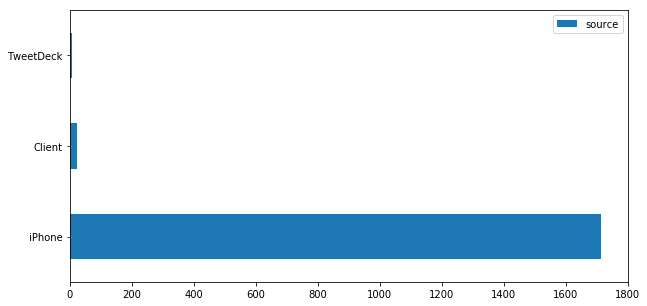

In [37]:
#------------------------------------
# creating chart from source
#------------------------------------
df_source=pd.DataFrame(df_twitter_archive_master.source.value_counts())
df_source.plot.barh(figsize=(10,5))

About plot shows that majority of users used iPhone to tweet

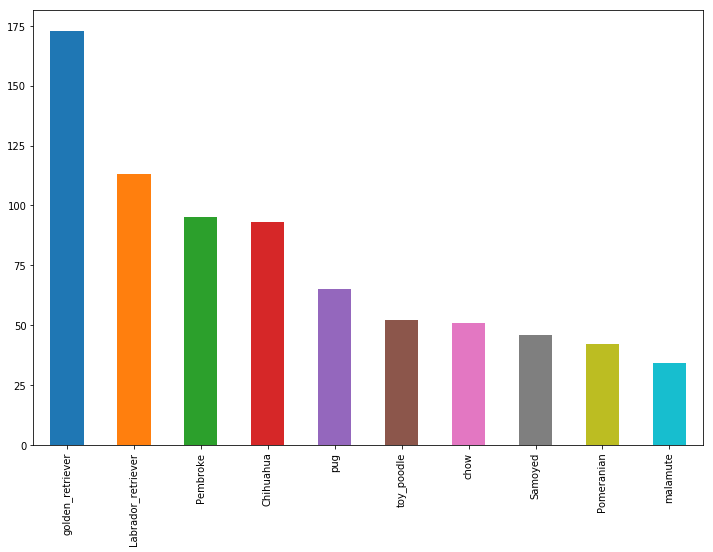

In [38]:
#---------------------------------------
# creating top10 breed frequentcy chart  
#---------------------------------------
df_twitter_archive_master['breed'].value_counts()[0:10].plot.bar(figsize=(12,8))

About figure shows golden retriever is the most popular breed in household

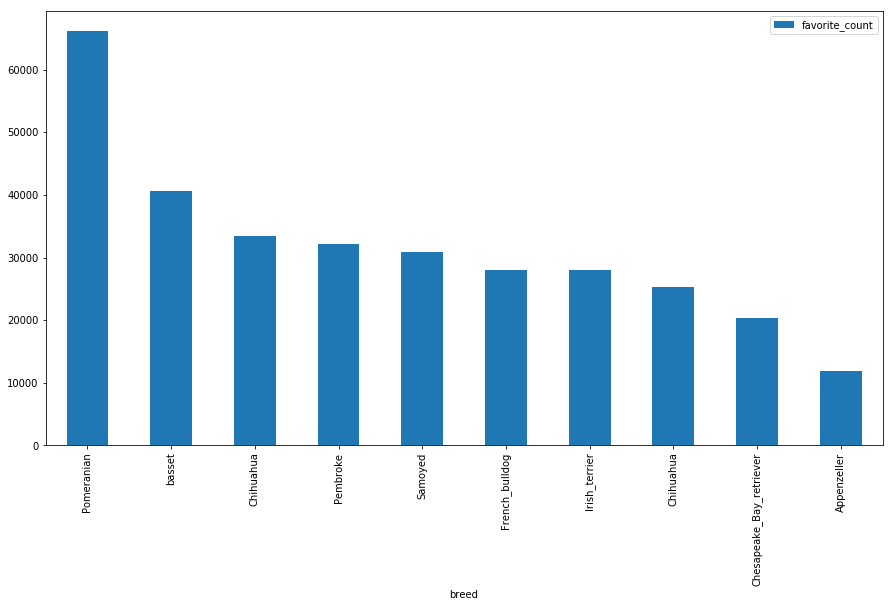

In [39]:
#------------------------------------------------
# sort by favorite_count and show top 10 
# breeds of favorited count and retweeted count
#------------------------------------------------
df_twitter_archive_master[['breed','favorite_count']][0:10].sort_values(by='favorite_count',ascending=False).plot.bar(by='breed',x='breed',figsize=(15,8))

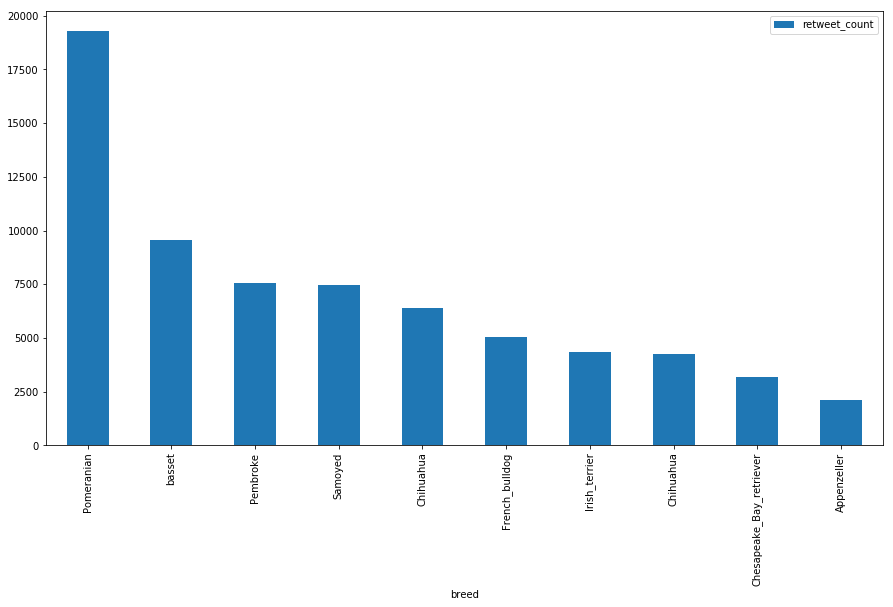

In [40]:
df_twitter_archive_master[['breed','retweet_count']][0:10].sort_values(by='retweet_count',ascending=False).plot.bar(by='breed',x='breed',figsize=(15,8))

Although golden retriever is most popular household dog, but based on above two charts, pictures of Pomeranian are most favorited and retweeted on twitter.